In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
rawfeats = pd.read_csv('data/dengue_features_train.csv')
rawlabels = pd.read_csv('data/dengue_labels_train.csv')
rawfeats['total_cases'] = rawlabels.total_cases
rawfeats.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


## IQ

In [125]:
iq = rawfeats[rawfeats.city=='iq'].copy()

In [126]:
for year in iq.year.unique():
    print(f'{year} max: {max(iq[iq.year==year]["weekofyear"])}\
  | min: {min(iq[iq.year==year]["weekofyear"])} | uniques: {iq[iq.year==year]["weekofyear"].nunique()}')

2000 max: 51  | min: 26 | uniques: 26
2001 max: 52  | min: 1 | uniques: 52
2002 max: 52  | min: 1 | uniques: 52
2003 max: 52  | min: 1 | uniques: 52
2004 max: 52  | min: 1 | uniques: 52
2005 max: 53  | min: 1 | uniques: 52
2006 max: 52  | min: 1 | uniques: 52
2007 max: 52  | min: 1 | uniques: 52
2008 max: 52  | min: 1 | uniques: 52
2009 max: 52  | min: 1 | uniques: 52
2010 max: 53  | min: 1 | uniques: 26


In [134]:
for year in iq.year.unique():
    print(year,iq[iq.year==year]['weekofyear'].unique(),'\n')

2000 [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51] 

2001 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52] 

2002 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52] 

2003 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52] 

2004 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52] 

2005 [53  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51] 

2006 [52  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23

In [135]:
#2005,2006, and 2010 have issues here. let's look closer:
#here we find that the first week of the year is registering as 53 
#instead of 1. We'll need to increment each week value in those
#years by one
for year in [2005,2006,2010]:
    display(iq[iq.year==year-1].tail(3))
    display(iq[iq.year==year].head(3))

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
1167,iq,2004,50,2004-12-09,0.323429,0.309514,0.275829,0.335900,70.04,297.787143,...,93.938571,70.04,18.207143,6.500000,NaN,NaN,NaN,NaN,9.9,116
1168,iq,2004,51,2004-12-16,0.261143,0.203314,0.243743,0.236357,49.56,298.701429,...,88.780000,49.56,18.040000,10.214286,28.375,9.65,34.0,22.6,128.3,32
1169,iq,2004,52,2004-12-23,0.364862,0.326600,0.403112,0.316200,109.83,298.404286,...,93.252857,109.83,18.855714,8.228571,27.800,8.50,33.3,22.6,100.8,7


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
1170,iq,2005,53,2005-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1171,iq,2005,1,2005-01-08,0.314843,0.186629,0.3033,0.270400,70.60,298.162857,...,93.005714,70.60,18.370000,9.757143,28.5,9.1,33.2,23.0,74.9,10
1172,iq,2005,2,2005-01-15,0.304414,0.361257,0.3126,0.315629,93.73,297.662857,...,95.530000,93.73,18.408571,7.228571,28.4,10.4,34.2,22.5,232.1,5


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
1219,iq,2005,49,2005-12-10,0.358586,0.219486,0.257914,0.299271,60.50,299.217143,...,87.721429,60.50,18.364286,9.100000,28.1,12.50,34.8,21.5,54.1,11
1220,iq,2005,50,2005-12-17,0.198443,0.194100,0.193014,0.247000,46.91,298.574286,...,92.957143,46.91,18.945714,8.200000,28.1,11.55,34.0,22.3,6.0,2
1221,iq,2005,51,2005-12-24,0.180575,0.141333,0.255283,0.138371,151.00,298.021429,...,95.674286,151.00,18.915714,6.485714,28.3,9.90,33.6,22.9,81.1,6


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
1222,iq,2006,52,2006-01-01,0.354600,0.219950,0.322517,0.256333,114.58,298.181429,...,93.821429,114.58,18.584286,7.385714,27.45,9.7,32.7,22.4,273.5,8
1223,iq,2006,1,2006-01-08,0.199514,0.239343,0.227657,0.215500,38.78,298.832857,...,73.161429,38.78,14.524286,12.314286,NaN,NaN,34.5,19.7,70.1,25
1224,iq,2006,2,2006-01-15,0.228400,0.202071,0.194750,0.230350,138.46,298.728571,...,88.335714,138.46,18.165714,9.885714,27.78,11.0,34.5,21.4,60.1,21


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
1427,iq,2009,50,2009-12-10,0.192200,0.193529,0.239886,0.285886,85.62,299.198571,...,87.752857,85.62,18.304286,10.442857,28.55,11.000,35.2,21.2,41.9,4
1428,iq,2009,51,2009-12-17,0.217600,0.240300,0.181771,0.262300,81.21,298.347143,...,92.958571,81.21,18.601429,6.671429,28.20,11.125,35.6,22.0,54.1,1
1429,iq,2009,52,2009-12-24,0.210422,0.257138,0.221133,0.300256,98.79,297.181429,...,96.885714,98.79,18.180000,5.257143,27.20,8.200,32.2,21.8,31.2,0


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
1430,iq,2010,53,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1431,iq,2010,1,2010-01-08,0.124571,0.179129,0.163843,0.135471,27.04,299.264286,...,78.271429,27.04,16.127143,11.100000,28.600000,12.3,35.1,21.8,NaN,10
1432,iq,2010,2,2010-01-15,0.145286,0.142314,0.135300,0.167529,32.99,298.297143,...,89.807143,32.99,17.758571,9.157143,27.833333,11.3,34.2,22.1,15.0,9


In [136]:
#corrected week of year
iq.loc[:,'weekofyear_fixed'] = np.where(iq.year==2005,iq.weekofyear+1, iq.weekofyear)
iq.loc[:,'weekofyear_fixed'] = np.where(iq.year==2006,iq.weekofyear_fixed+1, iq.weekofyear_fixed)
iq.loc[:,'weekofyear_fixed'] = np.where(iq.year==2010,iq.weekofyear_fixed+1, iq.weekofyear_fixed)
iq.loc[:,'weekofyear_fixed'] = np.where(iq.weekofyear_fixed>52,1, iq.weekofyear_fixed)
for year in iq.year.unique():
    print(f'{year} max: {max(iq[iq.year==year]["weekofyear_fixed"])}\
  | min: {min(iq[iq.year==year]["weekofyear_fixed"])}\
  | uniques: {iq[iq.year==year]["weekofyear_fixed"].nunique()}')
#Much better!

2000 max: 51  | min: 26  | uniques: 26
2001 max: 52  | min: 1  | uniques: 52
2002 max: 52  | min: 1  | uniques: 52
2003 max: 52  | min: 1  | uniques: 52
2004 max: 52  | min: 1  | uniques: 52
2005 max: 52  | min: 1  | uniques: 52
2006 max: 52  | min: 1  | uniques: 52
2007 max: 52  | min: 1  | uniques: 52
2008 max: 52  | min: 1  | uniques: 52
2009 max: 52  | min: 1  | uniques: 52
2010 max: 26  | min: 1  | uniques: 26


In [140]:
for year in iq.year.unique():
    print(year,iq[iq.year==year]['weekofyear_fixed'].unique(),'\n')

2000 [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51] 

2001 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52] 

2002 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52] 

2003 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52] 

2004 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52] 

2005 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52] 

2006 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24

# Test data check

In [2]:
test = pd.read_csv('data/dengue_features_test.csv')
iqt = test[test.city=='iq'].copy()
iqt.shape

(156, 24)

In [4]:
for year in iqt.year.unique():
    print(year,iqt[iqt.year==year]['weekofyear'].unique(),'\n')

2010 [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51] 

2011 [52  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51] 

2012 [52  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51] 

2013 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26] 



In [5]:
iqt.loc[:,'weekofyear_fixed'] = np.where(iqt.year==2011,
                                              iqt.weekofyear+1, iqt.weekofyear)
iqt.loc[:,'weekofyear_fixed'] = np.where(iqt.year==2012,
                                              iqt.weekofyear_fixed+1, iqt.weekofyear_fixed)
iqt.loc[:,'weekofyear'] = np.where(iqt.weekofyear_fixed>52,
                                              1, iqt.weekofyear_fixed)
for year in iqt.year.unique():
    print(year,iqt[iqt.year==year]['weekofyear'].unique(),'\n')

2010 [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51] 

2011 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52] 

2012 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52] 

2013 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26] 



In [141]:
#Fill nas with interpolation
iq = iq.interpolate(method='linear')

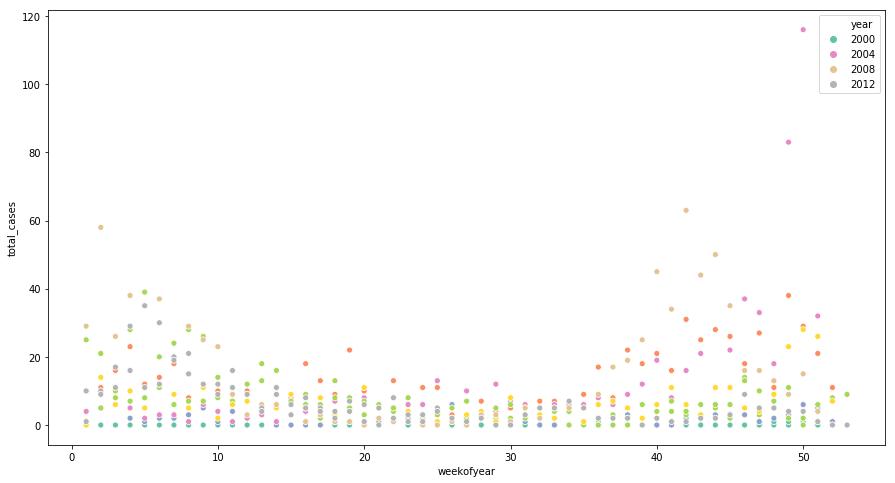

In [142]:
plt.figure(figsize=[15,8])
sns.scatterplot(x='weekofyear',y='total_cases', hue='year',data=iq, palette='Set2')
plt.show()

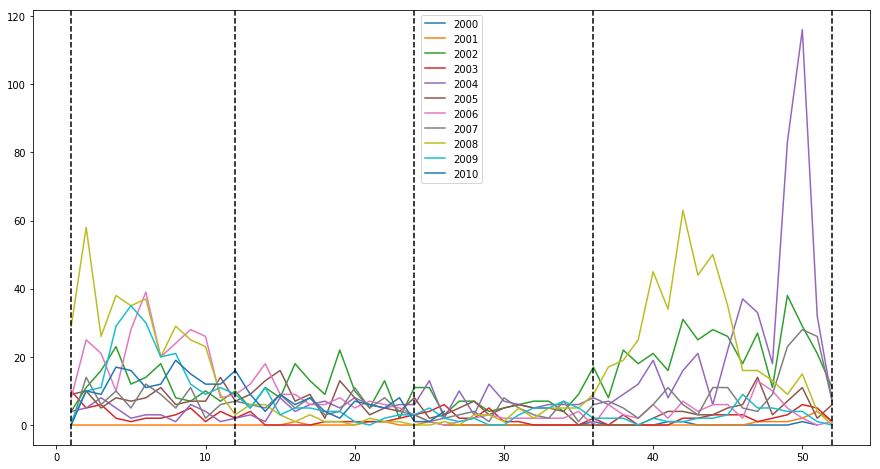

In [303]:
plt.figure(figsize=[15,8])
for year in iq.year.unique():
    plt.plot(iq[iq.year==year].weekofyear_fixed, iq[iq.year==year].total_cases, label=year)
plot_windows = [1,12,24,36,52]
for w in plot_windows:
    plt.axvline(w, linestyle='--',color='black')
plt.legend()
plt.show()
#We're going to exclude 2000 and 2001 from this imputation

In [160]:
windowsdict = {
    12:0,
    24:1,
    36:2,
    53:3
}

In [161]:
windows = []
for i in iq.weekofyear_fixed:
    for k,v in windowsdict.items():
        if i < k:
            windows.append(v)
            break
len(windows)

520

In [164]:
#Check
iq['windows'] = windows
iq.groupby(['windows','weekofyear_fixed'])['year'].agg('count')

windows  weekofyear_fixed
0        1                   10
         2                   10
         3                   10
         4                   10
         5                   10
         6                   10
         7                   10
         8                   10
         9                   10
         10                  10
         11                  10
1        12                  10
         13                  10
         14                  10
         15                  10
         16                  10
         17                  10
         18                  10
         19                  10
         20                  10
         21                  10
         22                  10
         23                  10
2        24                  10
         25                  10
         26                  11
         27                  10
         28                  10
         29                  10
         30                  10
         31   

In [304]:
def rn_years():
    '''
    Returns 4 random years from the valid range
    The windows will be stitched from these years
    '''
    years = [x for x in range(2002,2010)]
    return np.random.choice(years, size=4,replace=False)

In [305]:
def newyear(df):
    '''
    Returns a new df with simulated data stitched
    Together from 4 other years
    '''
    yrs = rn_years()
    outdf = df[(df.year==yrs[0]) & (df.windows==0)].copy()
    outdf = pd.concat([outdf,df[(df.year==yrs[1]) & (df.windows==1)]])
    outdf = pd.concat([outdf,df[(df.year==yrs[2]) & (df.windows==2)]])
    outdf = pd.concat([outdf,df[(df.year==yrs[3]) & (df.windows==3)]])
    outdf = outdf.reset_index()
    #give it a fake year
    year = ''
    for y in yrs:
        year = year + str(y%10)
    outdf.year = int(year)
    return outdf
    

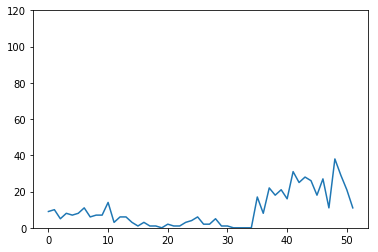

In [315]:
ny = newyear(iq)
plt.plot(ny.total_cases)
plt.ylim([0,120])
plt.show()

In [316]:
ny.head()

,index,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,...,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,weekofyear_fixed,windows
0,1170,iq,5832,53,2005-01-01,0.339853,0.256614,0.353206,0.293300,90.215,...,18.612857,8.992857,28.150000,8.800000,33.25,22.8,87.85,9,1,0
1,1171,iq,5832,1,2005-01-08,0.314843,0.186629,0.303300,0.270400,70.600,...,18.370000,9.757143,28.500000,9.100000,33.20,23.0,74.90,10,2,0
2,1172,iq,5832,2,2005-01-15,0.304414,0.361257,0.312600,0.315629,93.730,...,18.408571,7.228571,28.400000,10.400000,34.20,22.5,232.10,5,3,0
3,1173,iq,5832,3,2005-01-22,0.345933,0.311800,0.291000,0.337971,60.520,...,18.258571,11.357143,28.866667,11.166667,35.50,22.5,194.00,8,4,0
4,1174,iq,5832,4,2005-01-29,0.364367,0.277914,0.292557,0.280686,25.670,...,18.645714,9.985714,28.866667,12.066667,35.10,22.1,0.00,7,5,0


In [320]:
pd.__version__

'0.24.1'

In [317]:
imputed = iq.copy()

In [318]:
for i in range(80):
    imputed = pd.concat([imputed,newyear(iq)],sort=False)
imputed.shape

(4680, 28)

In [319]:
imputed.groupby('year').agg('count')

,city,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,weekofyear_fixed,windows,index
year,,,,,,,,,,,,,,,,,,,,,
2000,26,26,26,26,26,26,26,26,26,26,...,26,26,26,26,26,26,26,26,26,0
2001,52,52,52,52,52,52,52,52,52,52,...,52,52,52,52,52,52,52,52,52,0
2002,52,52,52,52,52,52,52,52,52,52,...,52,52,52,52,52,52,52,52,52,0
2003,52,52,52,52,52,52,52,52,52,52,...,52,52,52,52,52,52,52,52,52,0
2004,52,52,52,52,52,52,52,52,52,52,...,52,52,52,52,52,52,52,52,52,0
2005,52,52,52,52,52,52,52,52,52,52,...,52,52,52,52,52,52,52,52,52,0
2006,52,52,52,52,52,52,52,52,52,52,...,52,52,52,52,52,52,52,52,52,0
2007,52,52,52,52,52,52,52,52,52,52,...,52,52,52,52,52,52,52,52,52,0
2008,52,52,52,52,52,52,52,52,52,52,...,52,52,52,52,52,52,52,52,52,0


# SJ

In [4]:
sj = rawfeats[rawfeats.city=='sj'].copy()
print(sj.shape)
sj.head()

(936, 25)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [5]:
#corrected week of year
sj.loc[:,'weekofyear_fixed'] = np.where(sj.year==1993,sj.weekofyear+1, sj.weekofyear)
for year in [1994,1995,1999,2000,2005,2006]:
    sj.loc[:,'weekofyear_fixed'] = np.where(sj.year==year,sj.weekofyear_fixed+1, sj.weekofyear_fixed)
sj.loc[:,'weekofyear_fixed'] = np.where(sj.weekofyear_fixed>52,1, sj.weekofyear_fixed)

1990 max: 52  | min: 18  | uniques: 35
1991 max: 52  | min: 1  | uniques: 52
1992 max: 52  | min: 1  | uniques: 52
1993 max: 52  | min: 1  | uniques: 52
1994 max: 52  | min: 1  | uniques: 52
1995 max: 52  | min: 1  | uniques: 52
1996 max: 52  | min: 1  | uniques: 52
1997 max: 52  | min: 1  | uniques: 52
1998 max: 52  | min: 1  | uniques: 52
1999 max: 52  | min: 1  | uniques: 52
2000 max: 52  | min: 1  | uniques: 52
2001 max: 52  | min: 1  | uniques: 52
2002 max: 52  | min: 1  | uniques: 52
2003 max: 52  | min: 1  | uniques: 52
2004 max: 52  | min: 1  | uniques: 52
2005 max: 52  | min: 1  | uniques: 52
2006 max: 52  | min: 1  | uniques: 52
2007 max: 52  | min: 1  | uniques: 52
2008 max: 17  | min: 1  | uniques: 17


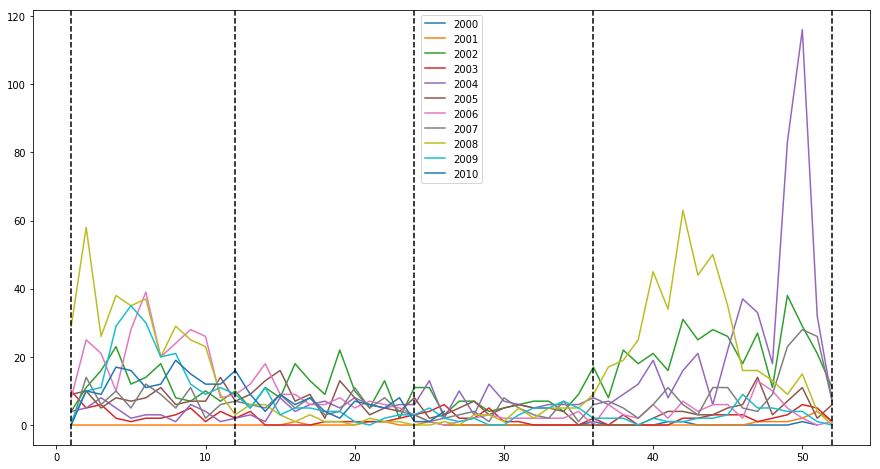

In [303]:
plt.figure(figsize=[15,8])
for year in iq.year.unique():
    plt.plot(iq[iq.year==year].weekofyear_fixed, iq[iq.year==year].total_cases, label=year)
plot_windows = [1,12,24,36,52]
for w in plot_windows:
    plt.axvline(w, linestyle='--',color='black')
plt.legend()
plt.show()
#We're going to exclude 2000 and 2001 from this imputation

In [160]:
windowsdict = {
    12:0,
    24:1,
    36:2,
    53:3
}

In [161]:
windows = []
for i in iq.weekofyear_fixed:
    for k,v in windowsdict.items():
        if i < k:
            windows.append(v)
            break
len(windows)

520